Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /home/pmin/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth
100.0%
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or

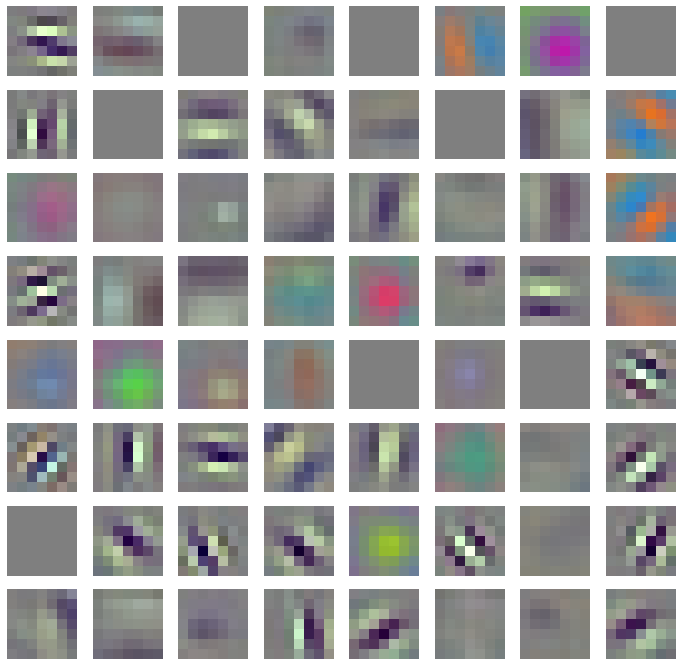

In [1]:
import torchvision.models as models

resnet18 = models.resnet18(pretrained=True)
#alexnet = models.alexnet()
#vgg16 = models.vgg16()
#squeezenet = models.squeezenet1_0()
#densenet = models.densenet161()
#inception = models.inception_v3()
#googlenet = models.googlenet()
#shufflenet = models.shufflenet_v2_x1_0()
#mobilenet = models.mobilenet_v2()
#resnext50_32x4d = models.resnext50_32x4d()
#wide_resnet50_2 = models.wide_resnet50_2()
#mnasnet = models.mnasnet1_0()

#alexnet
#vgg16
#densenet = models.densenet161()
#densenet
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))
for i in range(64):
    plt.subplot(8, 8, i + 1)
    plt.imshow(.5+.7*resnet18.conv1.weight[i, :, :, :].detach().numpy().transpose((1, 2, 0)))
    plt.axis('off')

In [131]:
import sys
sys.path.append('../')

from python_dict_wrapper import wrap

from modelzoo.slowfast_wrapper import SlowFast
from modelzoo.motionnet import MotionNet

In [132]:
args = wrap({'features': 'I3D',
            'slowfast_root': '../../slowfast/',
            'ckpt_root': '../pretrained'})
model = SlowFast(args)
model2 = MotionNet(args)

In [ ]:
## import matplotlib.pyplot as plt

from matplotlib import animation
from IPython.display import HTML

def get_anim(result, norm=False):
    fig = plt.figure(figsize=(1, 1))
    ax = plt.gca()
    im = plt.imshow([[1]], cmap='gray')
    plt.axis('off')
    nt = result.shape[-1]

    scale = None
    if norm:
        scale = max([abs(result.min()), abs(result.max())])

    def drawframe(n):
        if n >= nt:
            n = nt - 1
        
        if scale is None:
            im.set_data(result[..., n])
        else:
            im.set_data( .5 / scale * result[..., n] + .5)
        return (im)

    # blit=True re-draws only the parts that have changed.
    anim = animation.FuncAnimation(fig, drawframe, frames=nt*2, interval=100, blit=False)
    plt.close()
    return anim.to_html5_video()

html = "<div style='display:flex; flex-flow: row wrap'>"
for idx in range(64):
    html += "<div>"
    html += f"<div><span style='padding-left:10px'>kernel {idx}</span></div>"
    html += get_anim(model.model.s1.pathway0_stem.conv.weight[idx, ...].permute(2, 3, 0, 1).cpu().detach().numpy(), norm=True)
    html += "</div>"
    
HTML(html)

In [156]:
model

SlowFast(
  (model): ResNet(
    (s1): VideoModelStem(
      (pathway0_stem): ResNetBasicStem(
        (conv): Conv3d(3, 64, kernel_size=[5, 7, 7], stride=[1, 2, 2], padding=[2, 3, 3], bias=False)
        (bn): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (pool_layer): MaxPool3d(kernel_size=[1, 3, 3], stride=[1, 2, 2], padding=[0, 1, 1], dilation=1, ceil_mode=False)
      )
    )
    (s2): ResStage(
      (pathway0_res0): ResBlock(
        (branch1): Conv3d(64, 256, kernel_size=(1, 1, 1), stride=[1, 1, 1], bias=False)
        (branch1_bn): BatchNorm3d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (branch2): BottleneckTransform(
          (a): Conv3d(64, 64, kernel_size=[3, 1, 1], stride=[1, 1, 1], padding=[1, 0, 0], bias=False)
          (a_bn): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (a_relu): ReLU(inplace=True)
          (b): C

In [155]:
html = "<div style='display:flex; flex-flow: row wrap'>"
for idx in range(32):
    html += "<div>"
    html += f"<div><span style='padding-left:10px'>kernel {idx}</span></div>"
    html += get_anim(.5 + 50*model2.conv1.weight[idx, ...].permute(2, 3, 0, 1).repeat(1, 1, 3, 1).squeeze().cpu().detach().numpy(), norm=True)
    html += "</div>"
    
HTML(html)

In [153]:
model2.conv1.weight[idx, ...].permute(2, 3, 0, 1).shape

torch.Size([6, 6, 1, 6])

In [16]:
import sys

sys.path.append('../../slowfast/')

from slowfast.models.build import build_model
from slowfast.config.defaults import get_cfg

cfg = get_cfg()
cfg.merge_from_file('../modelzoo/config/slowfast.yaml')
model = build_model(cfg)

In [18]:
from slowfast.utils.checkpoint import load_checkpoint

load_checkpoint(
    cfg.TEST.CHECKPOINT_FILE_PATH,
    model,
    cfg.NUM_GPUS > 1,
    None,
    inflation=False,
    convert_from_caffe2=True,
)

-1

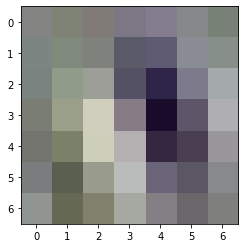

In [30]:
import matplotlib.pyplot as plt
plt.imshow(.5 + model.s1.pathway0_stem.conv.weight[10, :, 0, :, :].permute(1, 2, 0).cpu().detach().numpy())

In [38]:
model

SlowFast(
  (s1): VideoModelStem(
    (pathway0_stem): ResNetBasicStem(
      (conv): Conv3d(3, 64, kernel_size=[1, 7, 7], stride=[1, 2, 2], padding=[0, 3, 3], bias=False)
      (bn): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (pool_layer): MaxPool3d(kernel_size=[1, 3, 3], stride=[1, 2, 2], padding=[0, 1, 1], dilation=1, ceil_mode=False)
    )
    (pathway1_stem): ResNetBasicStem(
      (conv): Conv3d(3, 8, kernel_size=[5, 7, 7], stride=[1, 2, 2], padding=[2, 3, 3], bias=False)
      (bn): BatchNorm3d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (pool_layer): MaxPool3d(kernel_size=[1, 3, 3], stride=[1, 2, 2], padding=[0, 1, 1], dilation=1, ceil_mode=False)
    )
  )
  (s1_fuse): FuseFastToSlow(
    (conv_f2s): Conv3d(8, 16, kernel_size=[7, 1, 1], stride=[4, 1, 1], padding=[3, 0, 0], bias=False)
    (bn): BatchNorm3d(16, eps=1e-05, momentum=0.1, affine

In [46]:
import torch
X0 = torch.randn(1, 3, 32, 224, 224, device='cuda')
X1 = torch.randn(1, 3, 8, 224, 224, device='cuda')
data = [X1, X0]
model(data)

tensor([[ 4.2396e-01,  1.3500e+00, -5.5733e-01,  8.7831e-01, -1.6127e+00,
          1.9559e+00, -3.5884e-01, -1.2866e+00, -1.4967e+00, -9.6969e-01,
         -5.1529e-01, -4.0567e-01,  2.0932e-01, -9.6367e-01,  7.5442e-01,
         -2.0741e+00, -2.7333e-02, -2.6751e-01,  4.4267e-01, -7.0918e-01,
          5.2560e-01, -1.0741e-01,  3.4896e-01, -1.1917e+00, -5.9984e-01,
          1.0285e+00,  3.8836e-02, -1.0333e-01,  7.6372e-01, -3.5499e+00,
          1.2461e+00,  1.9592e-01,  3.4671e-02, -1.9899e+00,  2.2103e-01,
         -1.2238e+00,  1.9507e-01,  2.7940e-01, -3.3572e+00, -1.5767e+00,
          4.9914e-01,  1.3883e-01,  1.7670e+00,  1.4258e+00,  3.8693e-01,
          1.2710e+00,  2.4383e-01,  2.4918e+00,  8.8191e-01,  1.3166e+00,
         -3.8186e-01,  2.4000e+00, -1.9632e+00, -3.4348e-01, -1.2077e+00,
          1.0111e+00,  5.0678e-01,  6.9591e-01, -1.7322e+00, -2.0257e+00,
         -6.5038e-01, -7.5279e-02, -1.2702e-03, -8.8589e-01, -1.6104e+00,
          8.4731e-02, -2.3750e-01,  1.

In [3]:
from torchvision.models.video import r3d_18
r3d_18(pretrained=True)


VideoResNet(
  (stem): BasicStem(
    (0): Conv3d(3, 64, kernel_size=(3, 7, 7), stride=(1, 2, 2), padding=(1, 3, 3), bias=False)
    (1): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Sequential(
        (0): Conv3DSimple(64, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
        (1): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
      )
      (conv2): Sequential(
        (0): Conv3DSimple(64, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
        (1): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (relu): ReLU(inplace=True)
    )
    (1): BasicBlock(
      (conv1): Sequential(
        (0): Conv3DSimple(64, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
        (1):

In [2]:
from torchvision.models.vgg import vgg19
model = vgg19(pretrained=True)
model.features[0].__name__

ModuleAttributeError: 'Conv2d' object has no attribute '__name__'

In [18]:
layer = model.features[1]
layer.__repr__().startswith('ReLU')
for i in model.features:
    print(i.__repr__())

Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
ReLU(inplace=True)
Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
ReLU(inplace=True)
MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
ReLU(inplace=True)
Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
ReLU(inplace=True)
MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
ReLU(inplace=True)
Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
ReLU(inplace=True)
Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
ReLU(inplace=True)
Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
ReLU(inplace=True)
MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
ReLU(inplace=True

In [20]:
layers = [layer for layer in model.features if layer.__repr__().startswith('ReLU')]
len(layers)

16

In [26]:
import torch
model(torch.randn(1, 3, 112, 112))

tensor([[ 3.8394e+00,  4.2436e+00,  1.8956e+00,  1.1377e+00,  4.9419e+00,
          5.9250e+00,  6.7995e+00, -2.3058e+00, -1.4153e+00, -3.9622e+00,
         -5.9413e+00, -1.8262e+00,  1.1909e+00, -1.5431e+00, -3.1752e-01,
         -1.1433e+00, -4.6603e+00, -1.9927e+00, -6.3116e-01, -1.8314e+00,
         -3.2170e+00, -2.6702e+00, -3.9213e+00, -3.8299e+00, -3.1711e+00,
         -1.5367e+00, -6.3014e-01, -8.8959e-01,  1.1864e+00, -2.1281e+00,
         -1.8431e+00, -8.6710e-01, -3.0581e+00,  1.9696e+00,  1.4210e+00,
          6.2754e-01,  2.0623e+00,  3.3557e-01, -1.7202e+00, -2.8896e+00,
         -1.3155e+00, -3.2108e+00, -5.0341e+00, -2.9836e+00, -2.6453e+00,
         -1.0862e+00, -1.5757e+00, -3.5318e+00,  6.8995e-01, -3.0312e-01,
          2.2570e+00,  1.3473e+00,  2.2305e-01, -1.5024e+00, -6.2669e-01,
         -1.9825e-01, -2.1723e+00, -2.7431e+00,  2.0426e+00, -1.4990e-01,
          2.2539e+00,  3.9507e-01,  2.4556e-01, -1.7412e+00, -1.0272e+00,
          2.6008e+00, -2.7047e+00,  7.